In [1]:
import util
import numpy as np
import matplotlib.pyplot as plt
from vae import *

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

X = mnist.train._images.reshape(55000,784)
Y = mnist.train._labels
index = np.arange(55000)
np.random.shuffle(index)

train_bf = util.BatchFeeder(X[index[:54000]], Y[index[:54000]], 128)
valid_bf = util.BatchFeeder(X[index[54000:]], Y[index[54000:]], 32)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


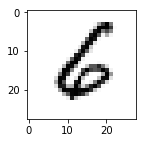

In [3]:
x, y = train_bf.next()
plt.figure(figsize=(2,2))
plt.imshow(x[0].reshape((28,28)), cmap='Greys')
plt.show()

# Training Variational AutoEncoder

In [4]:
v = VAE([784, 256, 128, 64, 2])

Tensor("BinearyXent/Neg:0", shape=(?,), dtype=float32)


In [5]:
v.train(train_bf, 40, valid_bf)

Epoch:1 train_cost: 195.486 valid_cost: 179.622 ( 5.02639 190.459 )
Epoch:2 train_cost: 170.627 valid_cost: 169.646 ( 5.01044 165.617 )
Epoch:3 train_cost: 163.179 valid_cost: 164.821 ( 5.13161 158.047 )
Epoch:4 train_cost: 158.913 valid_cost: 160.91 ( 5.34466 153.568 )
Epoch:5 train_cost: 155.58 valid_cost: 158.174 ( 5.5388 150.041 )
Epoch:6 train_cost: 152.909 valid_cost: 155.386 ( 5.75248 147.156 )
Epoch:7 train_cost: 150.767 valid_cost: 152.142 ( 5.84899 144.918 )
Epoch:8 train_cost: 149.459 valid_cost: 153.953 ( 5.97251 143.487 )
Epoch:9 train_cost: 148.338 valid_cost: 152.404 ( 6.01892 142.319 )
Epoch:10 train_cost: 147.36 valid_cost: 151.0 ( 6.09382 141.266 )
Epoch:11 train_cost: 146.788 valid_cost: 149.621 ( 6.11197 140.676 )
Epoch:12 train_cost: 146.201 valid_cost: 149.657 ( 6.16069 140.041 )
Epoch:13 train_cost: 145.556 valid_cost: 148.285 ( 6.21991 139.336 )
Epoch:14 train_cost: 145.142 valid_cost: 149.424 ( 6.24216 138.9 )
Epoch:15 train_cost: 144.742 valid_cost: 147.281 ( 

# Image generation across interpolated 2d space

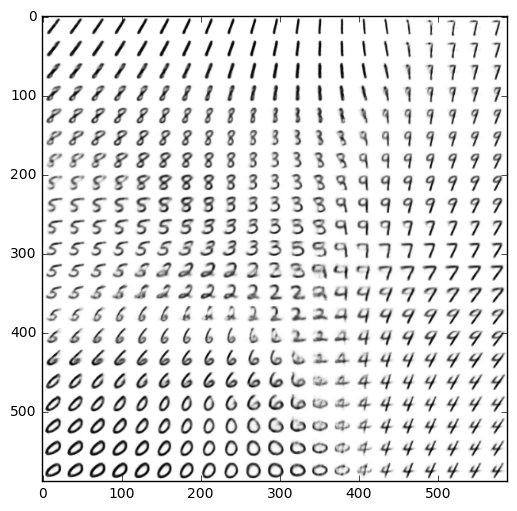

In [6]:
num_image = 20
_range = (-2,2)
latent_inputs = []
for i in range(num_image+1):
    for j in range(num_image+1):
        latent_inputs.append([_range[0]+(_range[1]-_range[0])*1.0/num_image*i,\
                              _range[0]+(_range[1]-_range[0])*1.0/num_image*j])
        
reconstructed = v.decode(latent_inputs)
result = np.zeros(((num_image+1)*28, (num_image+1)*28))
count = 0
for i in reconstructed:
    temp = i.reshape((28,28))
    result[count/(num_image+1)*28:(count/(num_image+1)+1)*28,\
           count%(num_image+1)*28:(count%(num_image+1)+1)*28] = temp
    count += 1

plt.figure(figsize=(6,6))
plt.imshow(result, cmap='Greys')
plt.show()

# Image completion examples

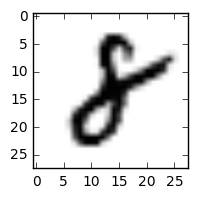

In [7]:
test = valid_bf.next()[0][0].reshape((28,28))
plt.figure(figsize=(2,2))
plt.imshow(test, cmap="Greys")
plt.show()

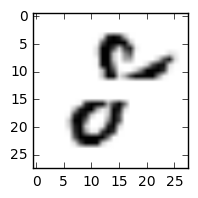

In [8]:
test[12:16, :] = 0
plt.figure(figsize=(2,2))
plt.imshow(test, cmap="Greys")
plt.show()

In [9]:
latent = v.encode(test.reshape((1,784)))[0]
reconstructed = v.decode(latent)[0].reshape((28,28))

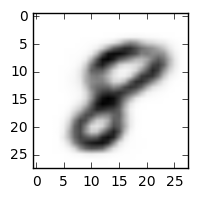

In [12]:
plt.figure(figsize=(2,2))
plt.imshow(reconstructed, cmap="Greys")
plt.show()